<a href="https://colab.research.google.com/github/utkarshanand336/Data-Science-Projects/blob/main/Ridge_%26_Losso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#target variable
boston_df['Price']=boston.target
#preview
boston_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


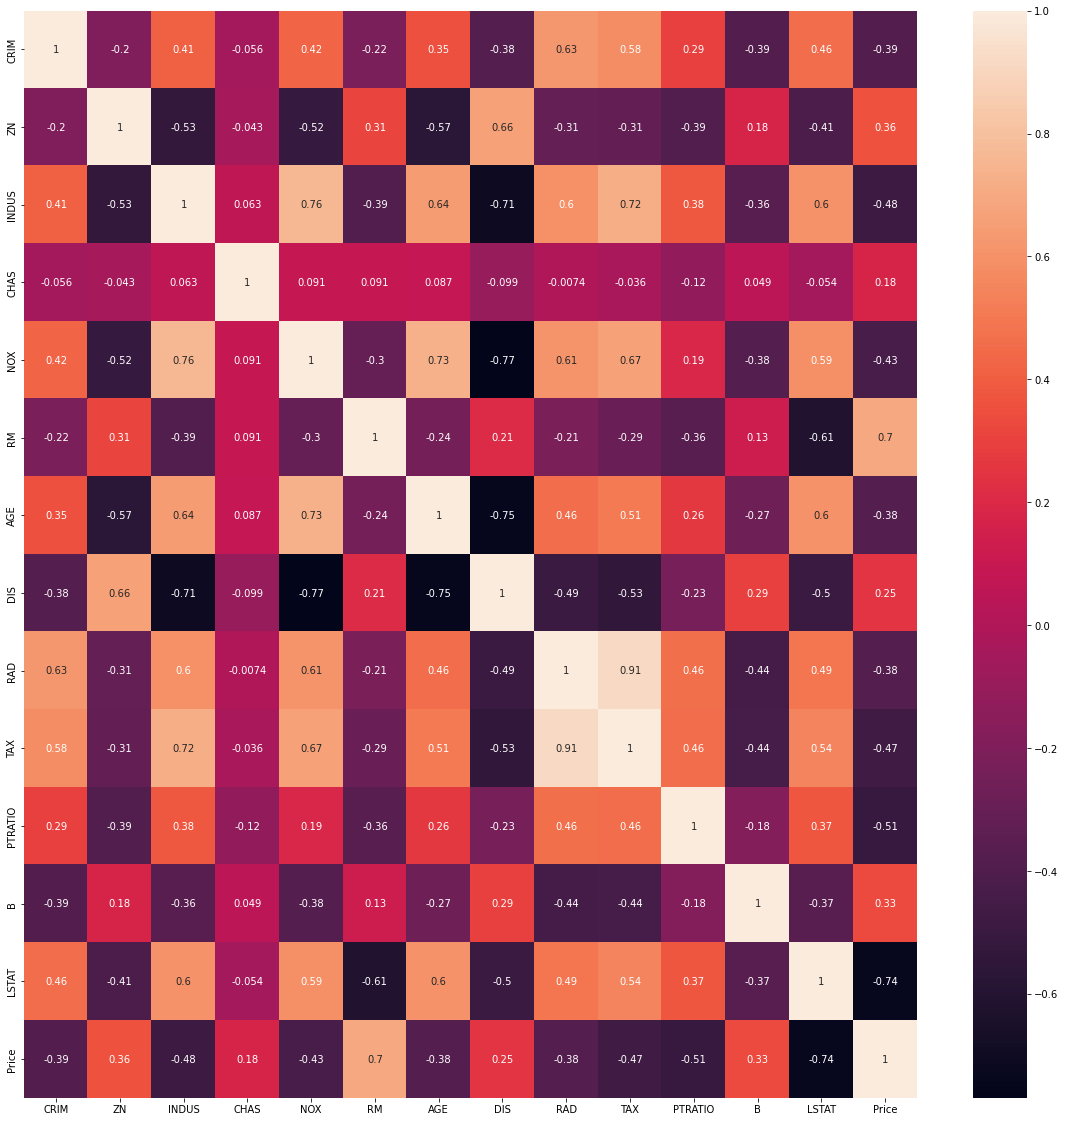

In [ ]:
#Exploration
plt.figure(figsize = (20, 20))
sns.heatmap(boston_df.corr(), annot = True)

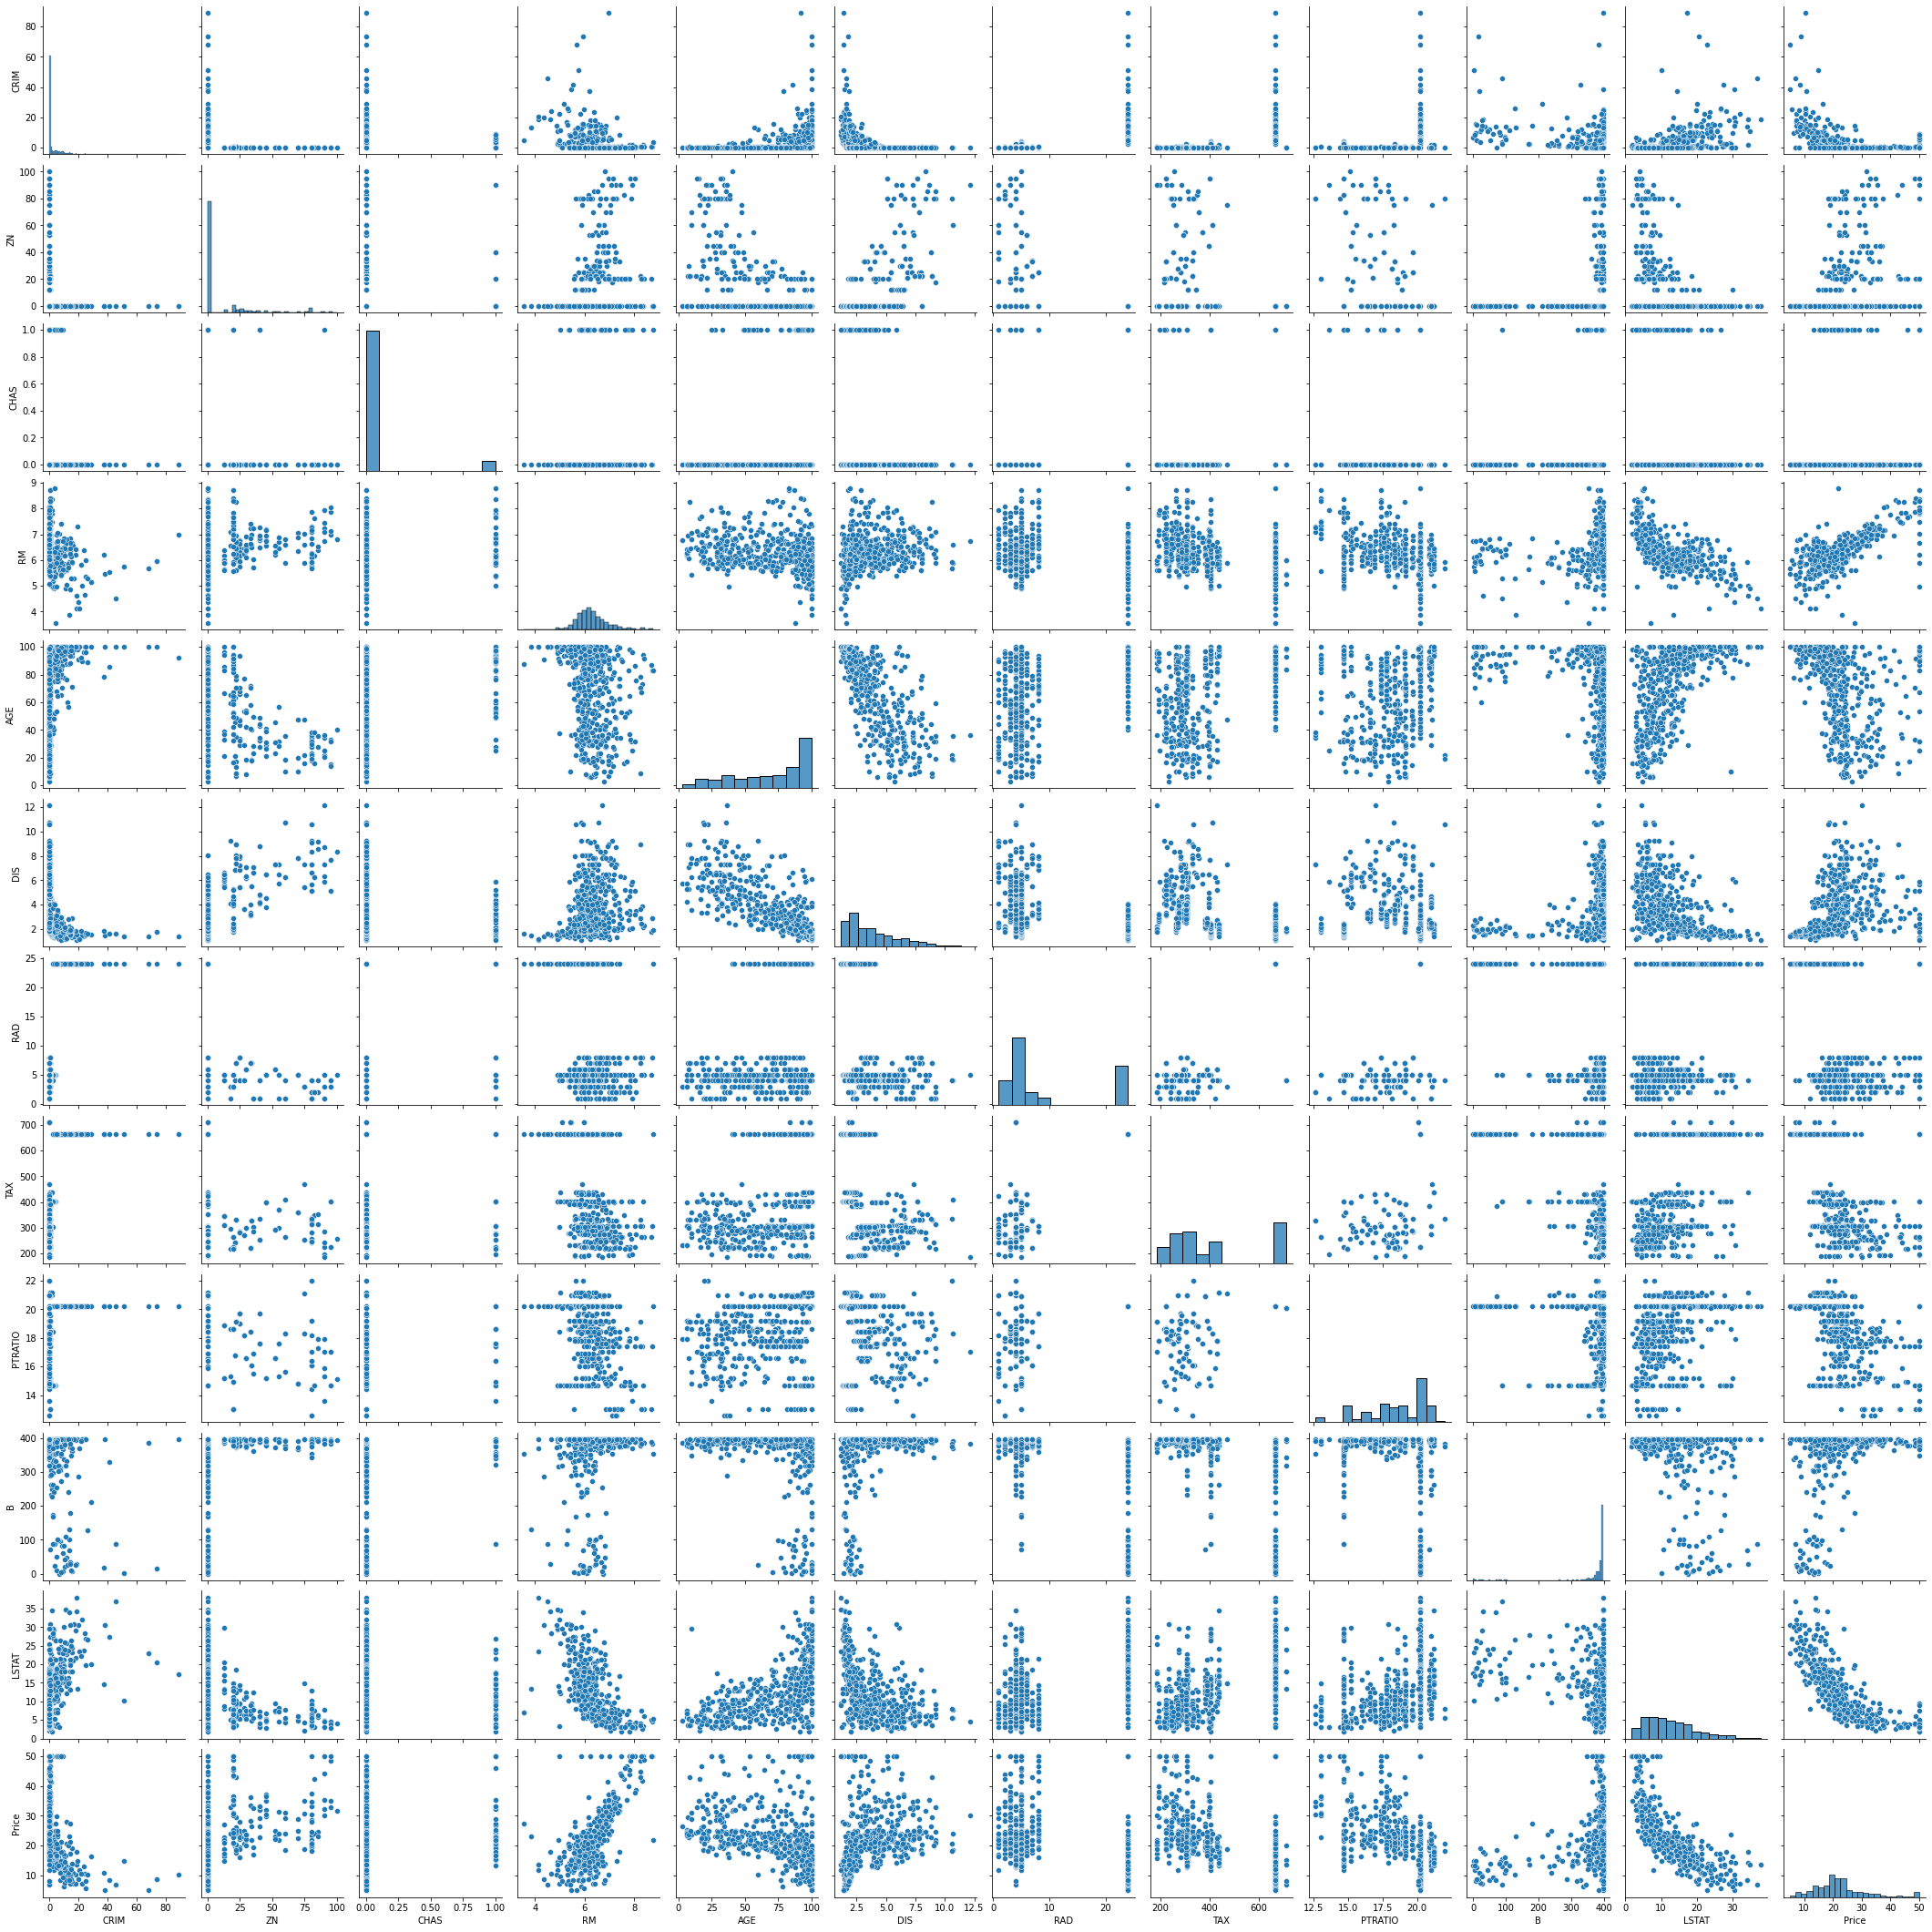

In [ ]:
#There are cases of multicolinearity, we will drop a few columns
boston_df.drop(columns = ["INDUS", "NOX"], inplace = True)

#pairplot
sns.pairplot(boston_df)

#we will log the LSTAT Column
boston_df.LSTAT = np.log(boston_df.LSTAT)

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   CHAS     506 non-null    float64
 3   RM       506 non-null    float64
 4   AGE      506 non-null    float64
 5   DIS      506 non-null    float64
 6   RAD      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  Price    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [ ]:
features = boston_df.columns[0:11]
target = boston_df.columns[-1]

#X and y values
X = boston_df[features].values
y = boston_df[target].values

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (354, 11)
The dimension of X_test is (152, 11)


In [ ]:
#Linear and Lassso Regression Models

In [ ]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)
print(prediction)

#actual
actual = y_test
print(actual)

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=80)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

[31.27994836 24.62432758 20.10284288 39.02546965 30.41583603 17.78348876
 41.43747209 23.82950443  6.64096551 32.76704089 16.21135835 19.85807105
 24.31054637 16.04391499 19.89020818 21.36727488 23.61522724 13.27142302
 12.38678113 20.47641883 30.79110868 27.68964826 15.54978607 19.25930399
 28.11500745 32.22659405 17.73349084 11.5086986  16.51579975 24.31577818
 23.80983771 17.83884717 26.58842933 20.13533262 23.20110774  9.73860053
 35.3647179  13.22117985 18.82768491 36.50265597 10.04900588 16.8724552
 26.42702321 23.017672   19.68290991 13.91075347 31.02168846 25.4939063
 20.28210646 18.32240521 30.38890584 19.78444208 28.28830532 26.40665469
 19.55515444 13.7041834  16.1493519  24.34533665 35.95519945 26.52890816
 26.14066585 19.96569741 23.57508803 20.47868064 17.97369959 24.90934989
 27.49010047 32.82312912 32.16719915 24.33097554 30.62708068 22.1238718
 27.71240887 35.17500468 12.35577131 26.69492228 27.08327727 29.34901008
 24.7145015  15.54486495 11.89027572 35.72495253 19.11

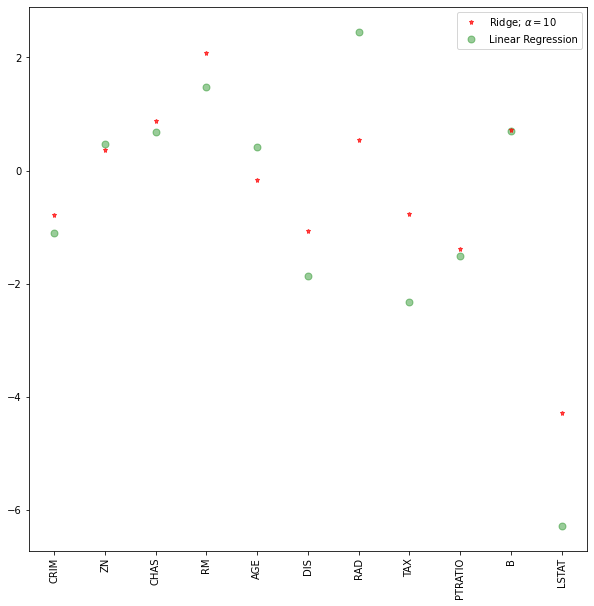

In [ ]:
# We can also plot the coefficients for both the linear and ridge models.
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
x=[1,2,3,4,5,6]
y=[2,4,6,8,10,12]


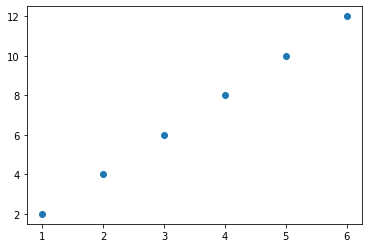

In [ ]:
plt.scatter(x,y)